In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#loads the dataset
energy = pd.read_csv('Energy_production.csv')

In [3]:
#Shows the first few rows of the dataset
energy.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Actual Production
0,0,01-09-2017,Northern,624.23,484.21,30.36,35.57,273.27,320.81,927.86
1,1,01-09-2017,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,1204.06
2,2,01-09-2017,Southern,576.66,578.55,62.73,49.80,111.57,64.78,750.96
3,3,01-09-2017,Eastern,441.02,429.39,NaN,NaN,85.94,69.36,526.96
4,4,01-09-2017,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21,53.75


In [4]:
#Show the information about the dataset
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   float64
 4   Thermal Generation Estimated (in MU)  4945 non-null   float64
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
 9   Total Actual Production               4945 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 386.5+ KB


In [5]:
#convert date from string to a date time format
energy['Date'] = pd.to_datetime(energy['Date'], format='%d-%m-%Y')

In [6]:
#Check the conversion
energy['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4945 entries, 0 to 4944
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
4945 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 38.8 KB


In [7]:
#Check for missing values
energy.isna().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
Total Actual Production                    0
dtype: int64

In [8]:
#Dropping the rows with null values
energy.dropna(axis = 0, inplace = True)

In [9]:
#Check the legth of dataset after dropping rows with null values
len(energy)

2967

In [10]:
#Drop unnecessary columns
energy.drop(columns=['index'], axis=1, inplace=True )

In [11]:
#Remove duplicates
energy = energy.drop_duplicates().copy()
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 4942
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  2967 non-null   datetime64[ns]
 1   Region                                2967 non-null   object        
 2   Thermal Generation Actual (in MU)     2967 non-null   float64       
 3   Thermal Generation Estimated (in MU)  2967 non-null   float64       
 4   Nuclear Generation Actual (in MU)     2967 non-null   float64       
 5   Nuclear Generation Estimated (in MU)  2967 non-null   float64       
 6   Hydro Generation Actual (in MU)       2967 non-null   float64       
 7   Hydro Generation Estimated (in MU)    2967 non-null   float64       
 8   Total Actual Production               2967 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 231.8+ KB


In [12]:
def plot_categorical_distribution():
    """
    Creates a bar chart to show the Total Actual Production by Region
    """
    #Group data by region and calculate total production
    region_total = energy.groupby('Region')['Total Actual Production'].sum()
    
    #Plot bar chart
    plt.figure(figsize=(8, 6))
    region_total.plot(kind='bar', color='green', width=0.8, label='Total Actual Production by Region')
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Total Actual Production', fontsize=14)
    plt.title('Total Energy Production by Region', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.show()
    return
    

In [13]:
def plot_categorical_distribution_histogram():
    """
    Creates histogram to show the the distribution of Total Actual Production.
    """
    #Plot histogram distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(energy['Total Actual Production'], kde=True, bins=30, color='purple', label='Total Energy Production')
    
    #To show the mean and median line on the histogram 
    plt.axvline(energy['Total Actual Production'].mean(), color='blue', linestyle='--', linewidth=3, label='Mean')
    plt.axvline(energy['Total Actual Production'].median(), color='green', linestyle='--', linewidth=3, label='Median')
    
    #set the axis labels
    plt.xlabel('Total Actual Production', fontsize=14, weight='bold')
    plt.ylabel('Frequency', fontsize=14, weight='bold')
    plt.title('Distribution of Total Actual Production', fontsize=14, weight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.show()
    return

In [14]:
def plot_relational_graph():
    """
    Creates a scatter graph to show relationship between the Actual Thermal Generated and Estimated Thermal Generated
    """
    plt.figure(figsize=(8, 8))
    
    #Scatter plot
    plt.scatter(energy['Thermal Generation Actual (in MU)'], 
                energy['Thermal Generation Estimated (in MU)'], alpha=0.7, marker='o', label='Thermal Points')
    plt.xlabel('Thermal Generation Actual (in MU)', fontsize=12, weight='bold')
    plt.ylabel('Thermal Generation Estimated (in MU)', fontsize=12, weight='bold')
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    plt.title('Thermal Genration: Actual vs Estimated', fontsize=14, weight='bold')
    plt.legend(loc='best', fontsize=14)
    plt.show()
    return

In [15]:
def plot_statistical_heatmap():
    """
    Create heatmap to display the correlation between all numerical columns
    """
    #Calculates the correlation matrix
    correlation = energy.select_dtypes(include=['float64']).corr()
    
    #Plot heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(correlation, annot=True, cmap = 'nipy_spectral', linewidth=0.8)
    plt.title('Correlation Heatmap Matrix', weight='bold')
    plt.show()
    return

In [16]:
def polynomial_fitting_and_prediction(energy, degree=3):
    """
    A polynomial fit that the relationship between Total Actual Production and Hydro Generation
    """
    #Normalize the selected data
    x = energy['Hydro Generation Actual (in MU)'].values
    y = energy['Total Actual Production'].values
    x_norm = (x - x.mean())/x.std()
    y_norm = (y - y.mean())/y.std()
    
    #Fits polynomial
    coefficient = np.polyfit(x_norm, y_norm, degree)
    polynomial_model = np.poly1d(coefficient)
    
    #Polynomial prediction
    y_polynomial = polynomial_model(x_norm)
    x_sorted = np.sort(x_norm)
    y_polynomial_sorted = polynomial_model(x_sorted)
    
    #Get the confidence interval and the errorbar
    error = y_norm - y_polynomial
    std_error = np.std(error)
    confidence_interval = std_error
    
    #To make prediction, take some points
    points = np.array([-1.6, 0, 1.6])
    
    #Predicting the new points
    predict = polynomial_model(points)
    upper_bound = predict + confidence_interval
    lower_bound = predict - confidence_interval
    
    # Plot the original data and the fitted curve
    plt.style.use('seaborn')
    plt.figure(figsize=(8, 8))
    
    #Scattered plot of normalized data
    plt.scatter(x_norm, y_norm, label = 'Actual Data', alpha=0.8, color='green')
    plt.plot(x_sorted, y_polynomial_sorted, color='blue', label='Polynomial fit', linewidth=2)
    
    #Confidence interval plot
    plt.fill_between(x_sorted, y_polynomial_sorted - confidence_interval, y_polynomial_sorted + confidence_interval, color='red', alpha=0.2, label='Confidence Interval')
    
    #Plots prediction and errorbar
    plt.scatter(points, predict, color='purple', s=200, label='Prediction')
    plt.errorbar(points, predict, yerr=confidence_interval, color='orange', label='Uncertainty')    
    plt.title('Polynomial Fit and Confidence Interval with Prediction', weight='bold')
    plt.xlabel('Hydro Generation Actual (in MU)', fontsize=14)
    plt.ylabel('Total Actual Production', fontsize=14)
    plt.xticks(fontsize=12)
    plt.legend()
    plt.show()
    return
    


In [17]:
def plot_elbow_method():
    """
    Plots the elbow method to find the optimal number of clusters
    """
    #Preparing the data
    energy_clust = energy[['Thermal Generation Actual (in MU)', 'Thermal Generation Estimated (in MU)', 'Nuclear Generation Actual (in MU)',
                       'Nuclear Generation Estimated (in MU)', 'Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)', 'Total Actual Production']]

    scaler = StandardScaler()
    normalize = scaler.fit_transform(energy_clust)
    
    #Compute WCSS for different cluster sizes
    wcss = []
    n_range = range(1, 11)
    for n in n_range:
        kmeans = KMeans(n_clusters=n, random_state=32)
        kmeans.fit(normalize)
        wcss.append(kmeans.inertia_)
        
    #Plot the elbow method   
    plt.style.use('ggplot')
    plt.figure(figsize=(8, 5))
    plt.plot(n_range, wcss, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters', fontsize=14, weight='bold')
    plt.ylabel('WCSS(INERTIA)', fontsize=14, weight='bold')
    plt.title('Elbow Method for best number of clusters', fontsize=14, weight='bold')
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold')
    plt.show()
    return

In [18]:
def Kmeans_clustering():
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    #Data for clustering
    energy_to_clust = energy[['Nuclear Generation Estimated (in MU)', 'Thermal Generation Estimated (in MU)' ]].copy()
    scaler = StandardScaler()
    scaled_energy = scaler.fit_transform(energy_to_clust)
    
    #Fits the KMeans model
    kmeans = KMeans(n_clusters=4, random_state=32)
    energy['Cluster'] = kmeans.fit_predict(scaled_energy)
    
    
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 10))
    
    #Scatter plot for clusters
    s = plt.scatter(scaled_energy[:, 0], scaled_energy[:, 1], c=energy['Cluster'], cmap='viridis', alpha=1.0, label='Data')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='p', label='Cluster Centers')
    cbar = plt.colorbar(s)
    cbar.set_label('Cluster', fontsize=14)
    plt.title('KMean Clustering of 4 number of Clusters', fontsize=16)
    plt.xlabel('Nuclear Generation Estimated (in MU)', fontsize=16)
    plt.ylabel('Thermal Generation Estimated (in MU)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best',fontsize=14, frameon=True, facecolor='brown')
    plt.show
    return

In [19]:
def clustering_prediction():
    """
    Predicts new points and show the clusters
    """
    #Prepare data for clustering
    energy_to_clust = energy[['Nuclear Generation Estimated (in MU)', 'Thermal Generation Estimated (in MU)' ]].copy()
    scaler = StandardScaler()
    scaled_energy = scaler.fit_transform(energy_to_clust)
    
    #Fits the KMeans model
    kmeans = KMeans(n_clusters=4, random_state=32)
    energy['Cluster'] = kmeans.fit_predict(scaled_energy)
    
    #Predict new points for clustering
    points = ([
        [-2.5, -2.0],
        [25, 950],
        [3.1, -0.5],
    ])
    
    #Scale new points
    scaled_points = scaler.transform(points)
    cluster_predicted = kmeans.predict(scaled_points)
    
    #Visualize the predicted clusters and original cluster
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 10))
    s = plt.scatter(scaled_energy[:, 0], scaled_energy[:, 1], c=energy['Cluster'], cmap='viridis', alpha=1.0, label='Data')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='p', label='Cluster Centers')
    
    #Plot the predicted points 
    for i, (new_points, cluster) in enumerate(zip(scaled_points, cluster_predicted)):
        plt.scatter(new_points[0], new_points[1], color='blue', edgecolor='brown', s=200, label=f'New points{i+1} (Cluster) {cluster}')
        plt.text(new_points[0], new_points[1], f'P{i+1}', fontsize=14, color='red')
        
    #Plots the color bar    
    cbar = plt.colorbar(s)
    cbar.set_label('Cluster', fontsize=14)
    plt.title('KMean Clustering of 4 number of Clusters and predicted points', fontsize=16)
    plt.xlabel('Nuclear Generation Estimated (in MU)', fontsize=16)
    plt.ylabel('Thermal Generation Estimated (in MU)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best', fontsize=14, frameon=True, facecolor='brown')
    plt.show
    return


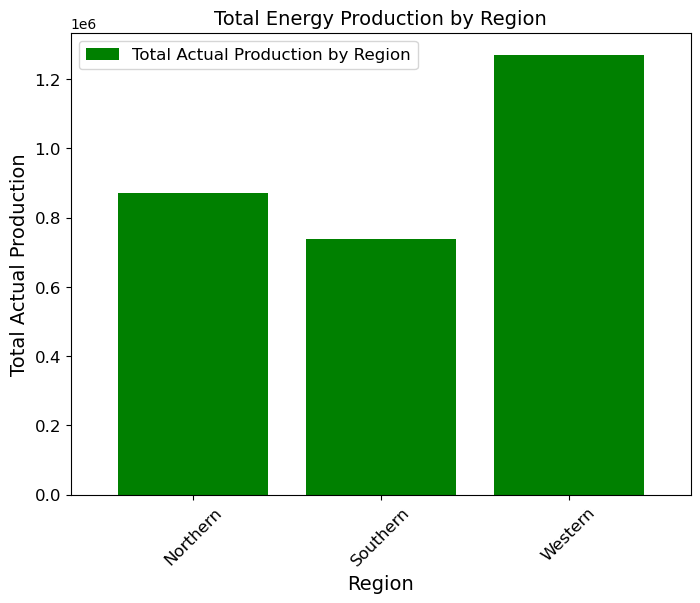

In [20]:
#Call the function
plot_categorical_distribution()

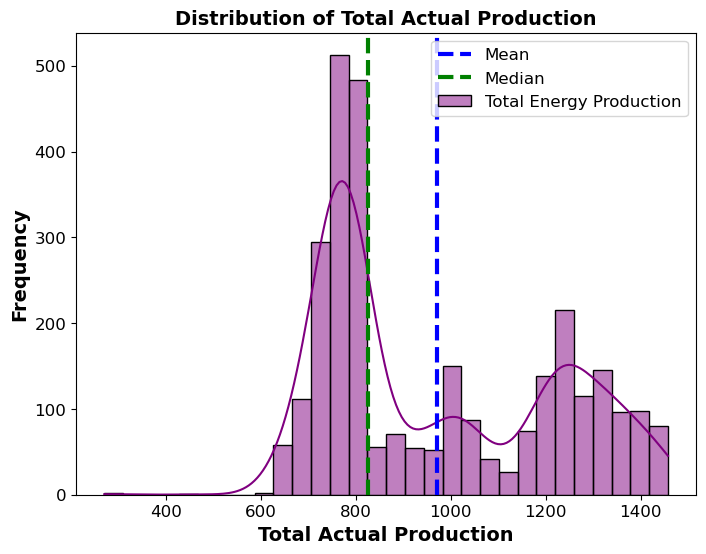

In [21]:
#Plot histogram
plot_categorical_distribution_histogram()

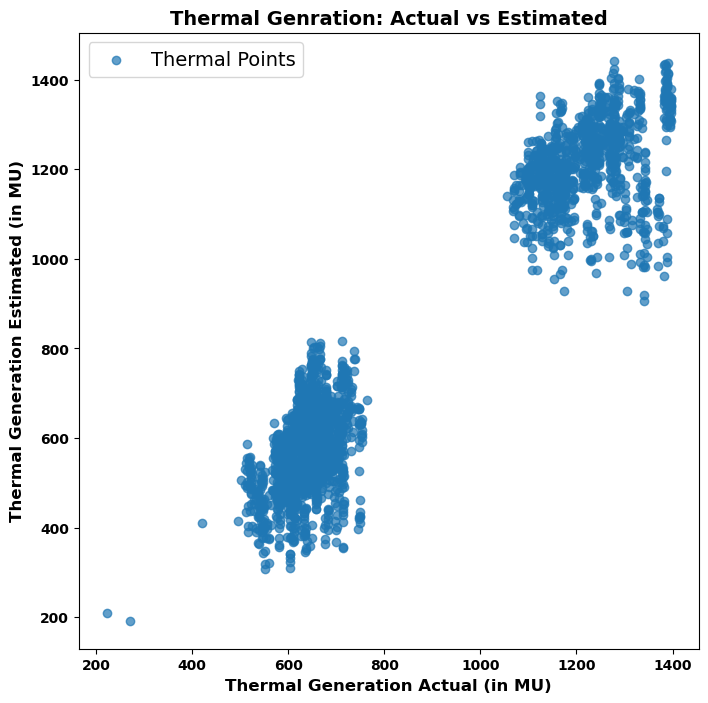

In [22]:
#Call the function
plot_relational_graph()

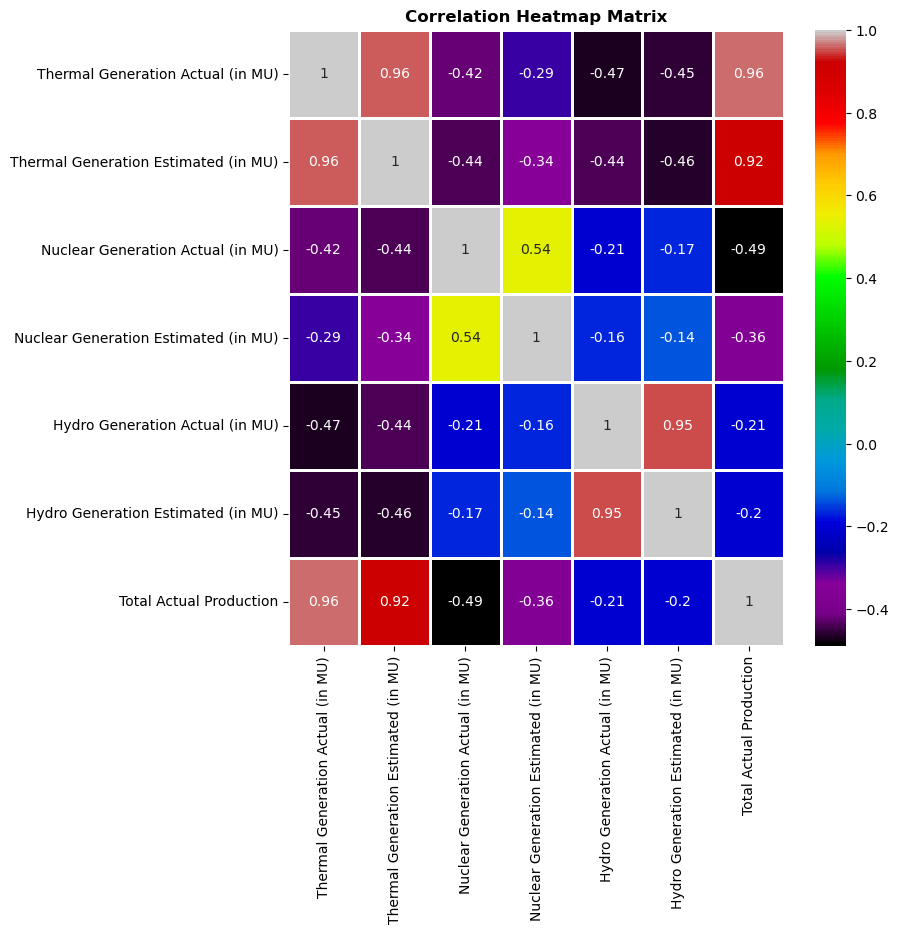

In [23]:
#Call the function
plot_statistical_heatmap()

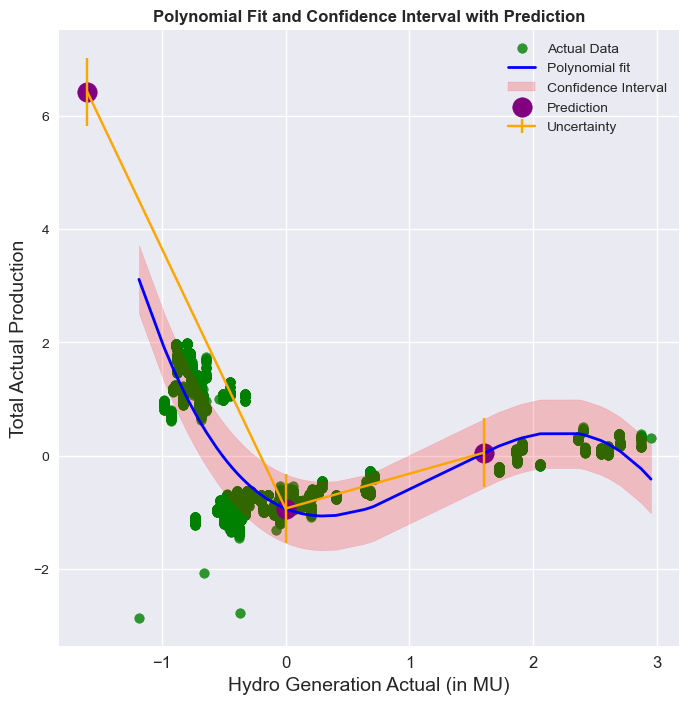

In [24]:
#Call the polynomial fitting and prediction function
polynomial_fitting_and_prediction(energy, degree=3)

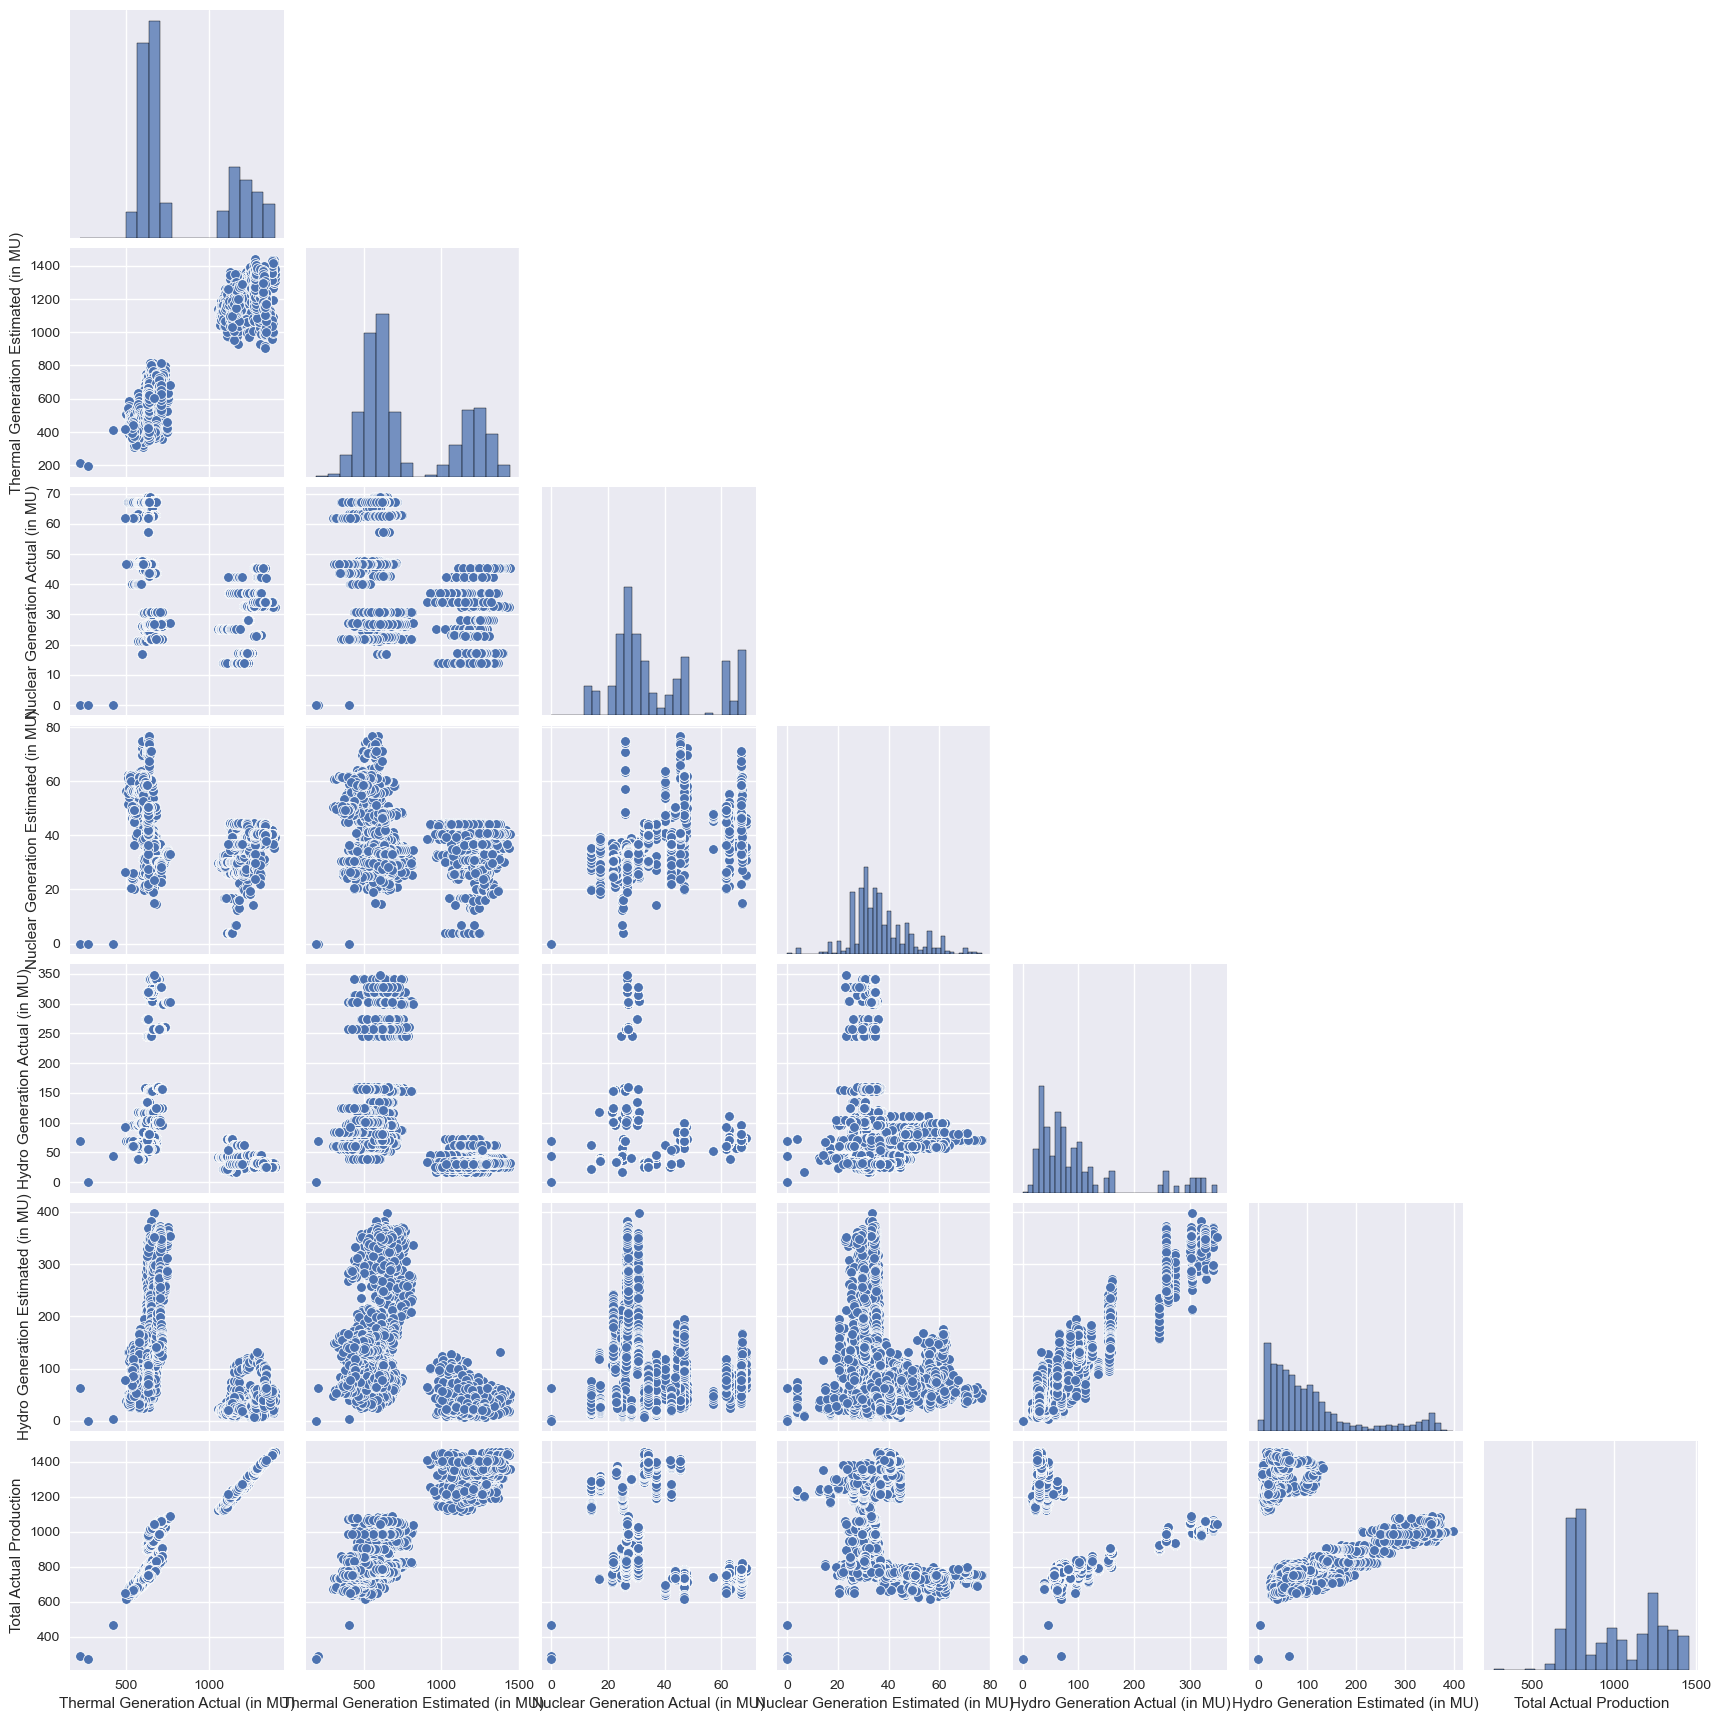

In [25]:
#Displays the pairplot to choose the relationship for fitting and clustering
sns.pairplot(energy, corner = True)

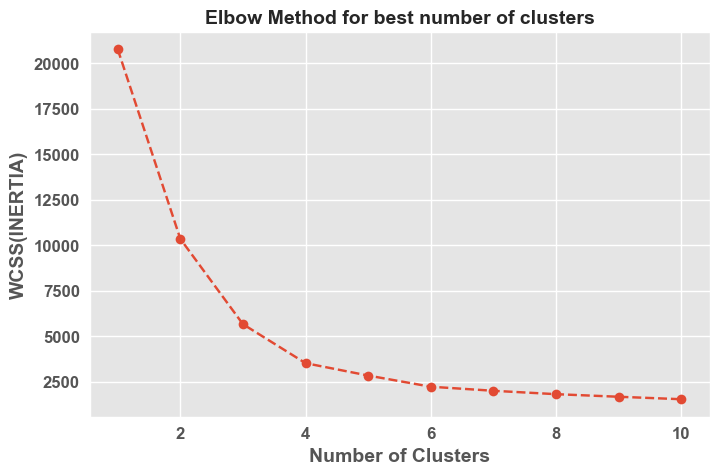

In [26]:
#Call the function
plot_elbow_method()

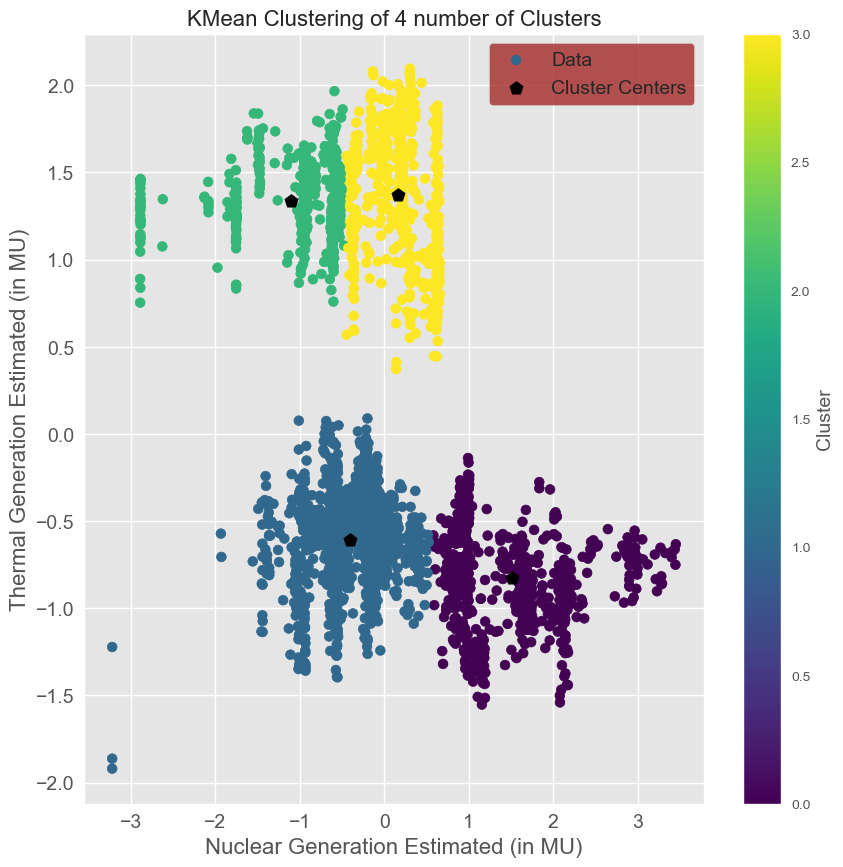

In [27]:
#Call the function
Kmeans_clustering()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


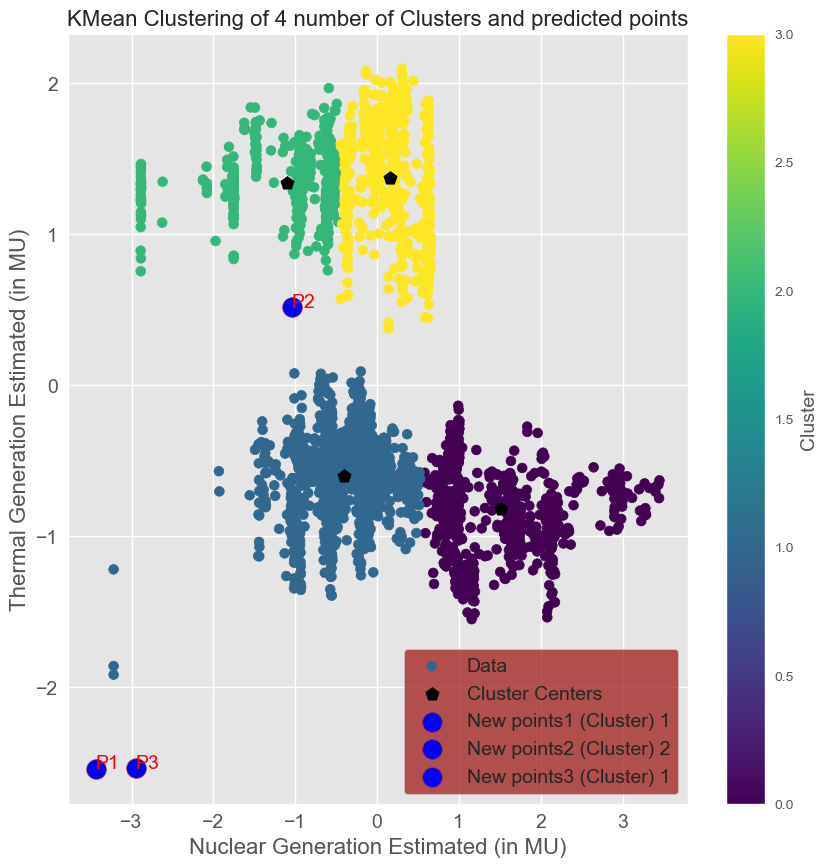

In [28]:
#Call the function
clustering_prediction()

In [29]:
#Show the correlaton of features in the data
energy.corr()

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Actual Production,Cluster
Thermal Generation Actual (in MU),1.000000,0.956430,-0.419748,-0.294428,-0.468069,-0.454108,0.959992,0.905698
Thermal Generation Estimated (in MU),0.956430,1.000000,-0.438368,-0.337708,-0.439152,-0.460362,0.918709,0.875542
Nuclear Generation Actual (in MU),-0.419748,-0.438368,1.000000,0.537841,-0.206886,-0.168583,-0.488649,-0.489915
Nuclear Generation Estimated (in MU),-0.294428,-0.337708,0.537841,1.000000,-0.164848,-0.136418,-0.360197,-0.429710
Hydro Generation Actual (in MU),-0.468069,-0.439152,-0.206886,-0.164848,1.000000,0.951497,-0.206018,-0.326473
Hydro Generation Estimated (in MU),-0.454108,-0.460362,-0.168583,-0.136418,0.951497,1.000000,-0.204232,-0.308520
Total Actual Production,0.959992,0.918709,-0.488649,-0.360197,-0.206018,-0.204232,1.000000,0.895969
Cluster,0.905698,0.875542,-0.489915,-0.429710,-0.326473,-0.308520,0.895969,1.000000


In [30]:
#Display the mean of features in the data
energy.mean(numeric_only=True)

Thermal Generation Actual (in MU)       833.310910
Thermal Generation Estimated (in MU)    789.818487
Nuclear Generation Actual (in MU)        37.242208
Nuclear Generation Estimated (in MU)     36.987877
Hydro Generation Actual (in MU)          99.831089
Hydro Generation Estimated (in MU)      105.651449
Total Actual Production                 970.384206
Cluster                                   1.303000
dtype: float64

In [31]:
#Display the median of features in the data
energy.median(numeric_only=True)

Thermal Generation Actual (in MU)       667.72
Thermal Generation Estimated (in MU)    637.94
Nuclear Generation Actual (in MU)        30.72
Nuclear Generation Estimated (in MU)     34.84
Hydro Generation Actual (in MU)          70.04
Hydro Generation Estimated (in MU)       75.96
Total Actual Production                 826.67
Cluster                                   1.00
dtype: float64

In [32]:
#Display the skewness of features in the data
energy.skew(numeric_only=True)

Thermal Generation Actual (in MU)       0.747377
Thermal Generation Estimated (in MU)    0.641190
Nuclear Generation Actual (in MU)       0.708281
Nuclear Generation Estimated (in MU)    0.623989
Hydro Generation Actual (in MU)         1.616304
Hydro Generation Estimated (in MU)      1.468925
Total Actual Production                 0.495192
Cluster                                 0.459321
dtype: float64

In [33]:
#Display the kurtosis of features in the data
energy.kurt(numeric_only=True)

Thermal Generation Actual (in MU)      -1.203941
Thermal Generation Estimated (in MU)   -1.216947
Nuclear Generation Actual (in MU)      -0.686238
Nuclear Generation Estimated (in MU)    1.095760
Hydro Generation Actual (in MU)         1.535846
Hydro Generation Estimated (in MU)      1.279195
Total Actual Production                -1.235947
Cluster                                -0.842363
dtype: float64

In [34]:
#Display the standard deviation of features in the data
energy.std(numeric_only=True)

Thermal Generation Actual (in MU)       280.860450
Thermal Generation Estimated (in MU)    311.474764
Nuclear Generation Actual (in MU)        15.883968
Nuclear Generation Estimated (in MU)     11.491292
Hydro Generation Actual (in MU)          84.381433
Hydro Generation Estimated (in MU)       93.049767
Total Actual Production                 244.477960
Cluster                                   1.001786
dtype: float64

In [35]:
#Shows the statistical summary of the dataset
energy.describe()

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Actual Production,Cluster
count,2967.00000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
mean,833.31091,789.818487,37.242208,36.987877,99.831089,105.651449,970.384206,1.303000
std,280.86045,311.474764,15.883968,11.491292,84.381433,93.049767,244.477960,1.001786
min,222.44000,191.910000,0.000000,0.000000,0.000000,0.000000,270.690000,0.000000
25%,631.18500,557.565000,26.140000,30.190000,40.940000,39.150000,764.670000,1.000000
50%,667.72000,637.940000,30.720000,34.840000,70.040000,75.960000,826.670000,1.000000
75%,1150.47000,1150.460000,46.830000,43.075000,111.570000,129.060000,1222.590000,2.000000
max,1395.97000,1442.380000,68.740000,76.640000,348.720000,397.380000,1457.080000,3.000000
